In [62]:
import pandas as pd

data = pd.read_pickle('meta_results/gvfc/gpt.pkl')

In [63]:
data.tail()

,news_title,Q1 Relevant,Q2 Focus,Q3 Theme1,Q3 Theme2,main_frame,classification_prompt,pred_label,conf_score,gpt_label,Match,classification_prompt_meta,gpt_confidence
1296,Robert Bowers arrest: Pittsburgh synagogue sho...,1,1,6,99,race,Framing is selecting aspects of data to commun...,80,10.500,race,True,Below is a question you have already answered:...,80
1297,Thousand Oaks shooter is the textbook example ...,1,2,6,99,race,Framing is selecting aspects of data to commun...,95,23.750,race,True,Below is a question you have already answered:...,95
1298,Who is Jemel Roberson? Black Security Guard Sh...,1,1,6,99,race,Framing is selecting aspects of data to commun...,95,22.875,race,True,Below is a question you have already answered:...,95
1299,"Son, I love you': Heartbreaking stories emerge...",1,2,7,99,public opinion,Framing is selecting aspects of data to commun...,80,4.750,public opinion,True,Below is a question you have already answered:...,80
1300,Pittsburgh synagogue shooting suspect indicted...,1,1,6,99,race,Framing is selecting aspects of data to commun...,20,10.250,race,True,Below is a question you have already answered:...,20


In [64]:
# List of percentage thresholds
percentages = [0.10, 0.15, 0.25, 0.50, 1]
# Rank the conf_score values (ascending order for bottom quantiles)
data['rank'] = data['conf_score'].rank(method='first')
#data['Match'] = (data['leaning'] == data['pred_label'].astype(str))


# Sort by rank
df_sorted = data.sort_values(by='rank')

# Iterate over the different percentage thresholds
for percentage in percentages:
    # Calculate the number of rows for the current percentage
    num_rows = int(len(data) * percentage)
    
    # Select only the exact number of rows corresponding to the percentage
    quantile_df = df_sorted.head(num_rows)
    
    # Count the number of False values in the "Match" column within this subset
    false_count = quantile_df[quantile_df['Match'] == False].shape[0]
    
    print(f"Number of False values in the bottom {int(percentage*100)}%: {false_count/1505}")
    print(num_rows)


Number of False values in the bottom 10%: 0.05581395348837209
130
Number of False values in the bottom 15%: 0.07574750830564785
195
Number of False values in the bottom 25%: 0.12358803986710963
325
Number of False values in the bottom 50%: 0.2
650
Number of False values in the bottom 100%: 0.2637873754152824
1301


In [65]:
false_count

397

In [45]:
import pandas as pd


# Define the percentage of data you want to include (e.g., 25% for bottom 25%)
percentage = 0.1
num_rows = int(len(data) * percentage)

# Rank the conf_score values (ascending order for bottom quantile)
data['rank'] = data['gpt_meta_confidence'].rank(method='first')

# Sort by rank
df_sorted = data.sort_values(by='rank')

# Select only the exact number of rows corresponding to the percentage
quantile_df = df_sorted.head(num_rows)

# Count the number of False values in the "Match" column within this subset
false_count = quantile_df[quantile_df['Match'] == False].shape[0]

print(f"Number of False values in the bottom {percentage*100}%: {false_count/1623}")


Number of False values in the bottom 10.0%: 0.2008626001232286


In [47]:
meta_quant_conf.head()

,ID,Target,Tweet,Stance,Opinion towards,Sentiment,prompts,label_logprobs,pred_label,raw_pred_label,conf_score,gpt_confidence,Match
0,10001,Atheism,He who exalts himself shall be humbled; a...,against,TARGET,POSITIVE,Statement: He who exalts himself shall be...,[],neutral,Neutral,6.625,90,False
1,10002,Atheism,RT @prayerbullets: I remove Nehushtan -previou...,against,TARGET,NEITHER,Statement: RT @prayerbullets: I remove Nehusht...,[],against,Against,9.000,90,True
2,10003,Atheism,@Brainman365 @heidtjj @BenjaminLives I have so...,against,TARGET,POSITIVE,Statement: @Brainman365 @heidtjj @BenjaminLive...,[],neutral,Neutral,8.125,60,False
3,10004,Atheism,#God is utterly powerless without Human interv...,against,TARGET,NEGATIVE,Statement: #God is utterly powerless without H...,[],for,For,5.500,85,False
4,10005,Atheism,@David_Cameron Miracles of #Multiculturalism...,against,OTHER,NEGATIVE,Statement: @David_Cameron Miracles of #Multi...,[],neutral,Neutral,3.125,70,False


In [1]:
import pandas as pd

conf_df = pd.read_pickle('norm_results/stance/gpt.pkl')
meta_quant_conf = pd.read_pickle('meta_results/stance/gpt.pkl')
meta_qual_conf = pd.read_pickle('meta_results_qual/stance/gpt.pkl')
ens_conf = pd.read_pickle('ens_results/stance/gpt.pkl')
p_conf = pd.read_pickle('p_results/stance/gpt.pkl')

conf_df['Match'] = (conf_df['Stance'] == conf_df['pred_label'].astype(str))
meta_quant_conf['Match'] = (meta_quant_conf['Stance'] == meta_quant_conf['pred_label'].astype(str))
meta_qual_conf['Match'] = (meta_qual_conf['Stance'] == meta_qual_conf['pred_label'].astype(str))
ens_conf['Match'] = (ens_conf['Stance'] == ens_conf['pred_label'].astype(str))
p_conf['Match'] = (p_conf['Stance'] == p_conf['pred_label'].astype(str))

conf_df['conf_score_eval'] = conf_df['conf_score']
meta_quant_conf['conf_score_eval'] = meta_quant_conf['gpt_confidence']
meta_qual_conf['conf_score_eval'] = meta_qual_conf['gpt_meta_qual_score_mapped']
ens_conf['conf_score_eval'] = ens_conf['ens_conf_score']
p_conf['conf_score_eval'] = p_conf['logit_inverse']

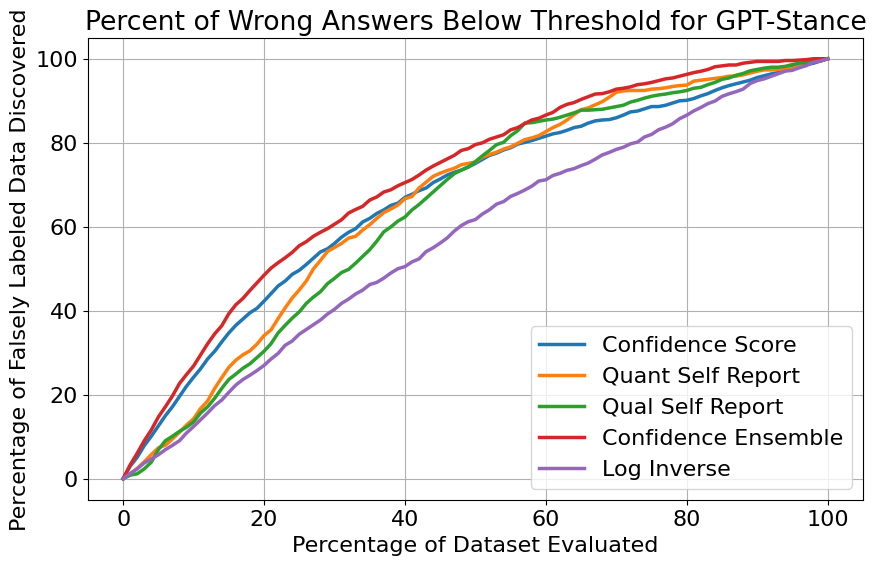

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set global font size for all text elements in the plot
plt.rcParams.update({'font.size': 16})  # Adjust the size as needed

# Sample data: Three dataframes with 'Match' and 'conf_score'
df1 = conf_df
df2 = meta_quant_conf
df3 = meta_qual_conf
df4 = ens_conf
df5 = p_conf

# Function to calculate the percentage of False matches for different dataset percentages
def false_percent_vs_data_percent(df, percentiles):
    total_falses = df[df['Match'] == False].shape[0]
    false_percentages = []
    
    # Rank the data by conf_score from low to high
    df_sorted = df.sort_values(by='conf_score_eval')
    
    for percentile in percentiles:
        # Calculate the number of rows to include based on the current percentile
        num_rows = int(len(df) * percentile)
        
        # Get the subset of the data based on the percentile
        subset_df = df_sorted.head(num_rows)
        
        # Count the number of False matches in this subset
        false_count = subset_df[subset_df['Match'] == False].shape[0]
        
        # Calculate the percentage of False matches out of total False values
        false_percentage = (false_count / total_falses) * 100
        false_percentages.append(false_percentage)
    
    return false_percentages

# Define the percentiles to evaluate (e.g., 10%, 20%, ..., 100%)
percentiles = np.arange(0.0, 1.01, 0.01)

# Calculate the percentage of False matches for each dataframe at different percentiles
false_percent_df1 = false_percent_vs_data_percent(df1, percentiles)
false_percent_df2 = false_percent_vs_data_percent(df2, percentiles)
false_percent_df3 = false_percent_vs_data_percent(df3, percentiles)
false_percent_df4 = false_percent_vs_data_percent(df4, percentiles)
false_percent_df5 = false_percent_vs_data_percent(df5, percentiles)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(percentiles * 100, false_percent_df1, label='Confidence Score', marker=None, linewidth=2.5)
plt.plot(percentiles * 100, false_percent_df2, label='Quant Self Report', marker=None, linewidth=2.5)
plt.plot(percentiles * 100, false_percent_df3, label='Qual Self Report', marker=None, linewidth=2.5)
plt.plot(percentiles * 100, false_percent_df4, label='Confidence Ensemble', marker=None, linewidth=2.5)
plt.plot(percentiles * 100, false_percent_df5, label='Log Inverse', marker=None, linewidth=2.5)

# Add labels and title
plt.xlabel('Percentage of Dataset Evaluated')
plt.ylabel('Percentage of Falsely Labeled Data Discovered')
plt.title('Percent of Wrong Answers Below Threshold for GPT-Stance')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('plots/gpt-stance.png')
plt.show()

In [6]:
from sklearn.metrics import auc
df1 = conf_df
df2 = meta_quant_conf
df3 = meta_qual_conf
df4 = ens_conf
df5 = p_conf

# Calculate AUC
qual_auc = auc(percentiles, false_percent_df3)
quant_auc = auc(percentiles, false_percent_df2)
p_auc = auc(percentiles, false_percent_df5)
conf_auc = auc(percentiles, false_percent_df1)
ens_auc = auc(percentiles, false_percent_df4)
print(f"Qual AUC: {qual_auc}")
print(f"Quant AUC: {quant_auc}")
print(f"p AUC: {p_auc}")
print(f"Conf AUC: {conf_auc}")
print(f"ens AUC: {ens_auc}")

Qual AUC: 64.61182108626197
Quant AUC: 66.28913738019169
p AUC: 57.431771894093686
Conf AUC: 67.07188498402554
ens AUC: 71.41054313099042


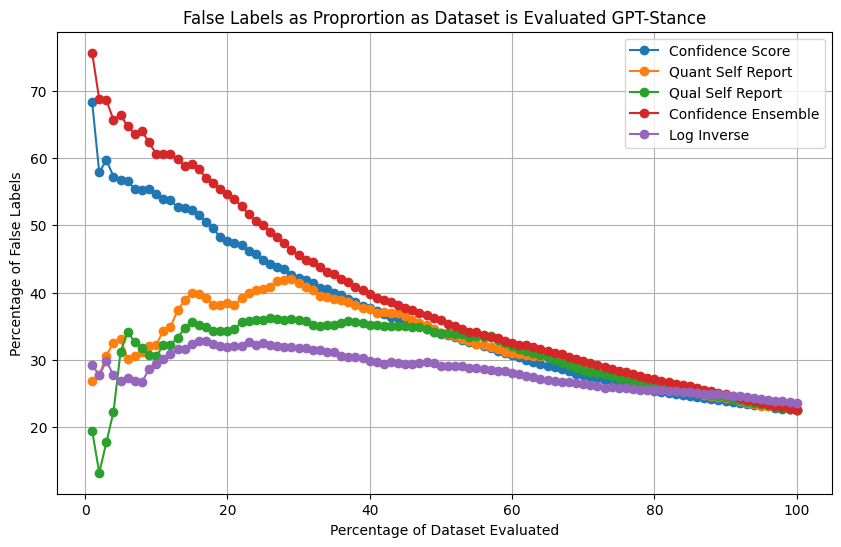

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the percentage of False matches relative to the data evaluated so far
def false_ratio_vs_data_length(df, percentiles):
    false_ratios = []
    
    # Rank the data by conf_score_eval from low to high
    df_sorted = df.sort_values(by='conf_score_eval')
    
    for percentile in percentiles:
        # Calculate the number of rows to include based on the current percentile
        num_rows = int(len(df) * percentile)
        
        # Get the subset of the data based on the percentile
        subset_df = df_sorted.head(num_rows)
        
        # Count the number of False matches in this subset
        false_count = subset_df[subset_df['Match'] == False].shape[0]
        
        # Calculate the percentage of False matches relative to data evaluated so far
        false_ratio = (false_count / num_rows) * 100 if num_rows > 0 else 0
        false_ratios.append(false_ratio)
    
    return false_ratios

# Define the percentiles to evaluate (e.g., 10%, 20%, ..., 100%)
percentiles = np.arange(0.01, 1.01, 0.01)  # From 1% to 100% of the data

# Calculate the percentage of False matches for each dataframe at different percentiles
false_ratio_df1 = false_ratio_vs_data_length(df1, percentiles)
false_ratio_df2 = false_ratio_vs_data_length(df2, percentiles)
false_ratio_df3 = false_ratio_vs_data_length(df3, percentiles)
false_ratio_df4 = false_ratio_vs_data_length(df4, percentiles)
false_ratio_df5 = false_ratio_vs_data_length(df5, percentiles)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(percentiles * 100, false_ratio_df1, label='Confidence Score', marker='o')
plt.plot(percentiles * 100, false_ratio_df2, label='Quant Self Report', marker='o')
plt.plot(percentiles * 100, false_ratio_df3, label='Qual Self Report', marker='o')
plt.plot(percentiles * 100, false_ratio_df4, label='Confidence Ensemble', marker='o')
plt.plot(percentiles * 100, false_ratio_df5, label='Log Inverse', marker='o')

# Add labels and title
#plt.xaxis(0,100)
plt.xlabel('Percentage of Dataset Evaluated')
plt.ylabel('Percentage of False Labels')
plt.title('False Labels as Proprortion as Dataset is Evaluated GPT-Stance')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [69]:
df4.head()

,ID,Target,Tweet,Stance,Opinion towards,Sentiment,prompts,label_logprobs,pred_label,raw_pred_label,conf_score,ens_conf_score,Match
0,10001,Atheism,He who exalts himself shall be humbled; a...,against,TARGET,POSITIVE,Statement: He who exalts himself shall be...,[],neutral,Neutral,6.625,15.678762,False
1,10002,Atheism,RT @prayerbullets: I remove Nehushtan -previou...,against,TARGET,NEITHER,Statement: RT @prayerbullets: I remove Nehusht...,[],against,Against,9.000,11.835938,False
2,10003,Atheism,@Brainman365 @heidtjj @BenjaminLives I have so...,against,TARGET,POSITIVE,Statement: @Brainman365 @heidtjj @BenjaminLive...,[],neutral,Neutral,8.125,8.125000,False
3,10004,Atheism,#God is utterly powerless without Human interv...,against,TARGET,NEGATIVE,Statement: #God is utterly powerless without H...,[],for,For,5.500,5.500000,False
4,10005,Atheism,@David_Cameron Miracles of #Multiculturalism...,against,OTHER,NEGATIVE,Statement: @David_Cameron Miracles of #Multi...,[],neutral,Neutral,3.125,3.125000,False


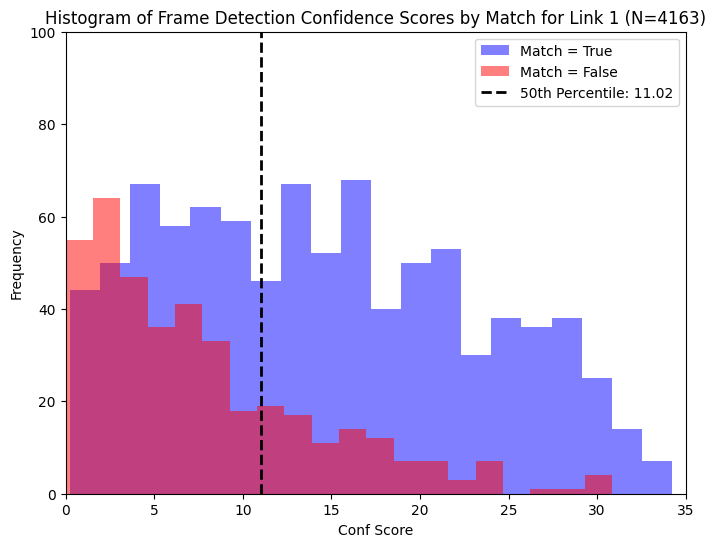

In [72]:
import matplotlib.pyplot as plt
df4 = pd.read_pickle('ens_results/gvfc/gpt.pkl')
# Create a new column that shows if OpenAI Predicted value is correct or incorrect.
df4['Match'] = (df4['main_frame'] == df4['gpt_label'])
#df4['Match'] = df4['Match'].astype(bool)
threshold = df4['ens_conf_score'].quantile(0.50)

# Plot a histogram of 'Prob' scores color-coded by the 'Match' binary values
plt.figure(figsize=(8, 6))
plt.hist(df4[df4['Match'] == True]['ens_conf_score'], bins=20, alpha=0.5, label='Match = True', color='blue')
plt.hist(df4[df4['Match'] == False]['ens_conf_score'], bins=20, alpha=0.5, label='Match = False', color='red')
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label=f'50th Percentile: {threshold:.2f}')
plt.xlabel('Conf Score')
plt.ylabel('Frequency')
plt.ylim((0, 100))
plt.xlim((0,35))
plt.title('Histogram of Frame Detection Confidence Scores by Match for Link 1 (N=4163)')
plt.legend()
plt.show()

In [ ]:
llm_gui llama1 flan1 gpt1 dataset.csv prompting.txt ci = .67